In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [2]:
df_abortion = pd.read_csv('../replication-materials-YingziJindata/abortion.csv')
df_music = pd.read_csv('../replication-materials-YingziJin/data/music.csv')
df_random = pd.read_csv('../replication-materials-YingziJin/data/random.csv')

In [4]:
df_random['engage_binary'] = df_random['engagement'].apply(lambda x: 1 if x > 0 else 0)

Text(0, 0.5, 'count of tweets')

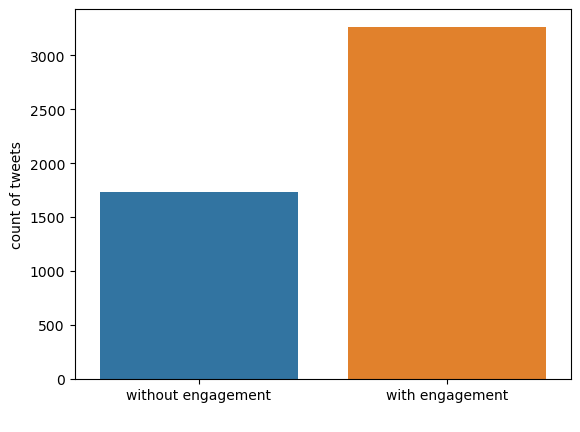

In [5]:
ax = sns.countplot(x=df_random['engage_cat'])
ax.set_xticklabels(['without engagement', 'with engagement'])
plt.xlabel(" ")
plt.ylabel("count of tweets")

In [16]:
data = pd.DataFrame({'x': df_random['absolute intensity'], 
'confounder': df_random['followersCount'], 
'y': df_random['engage_binary']})

In [17]:
formula = ('y ~ x + confounder')
model = logit(formula=formula, data=data).fit()

Optimization terminated successfully.
         Current function value: 0.643386
         Iterations 11


In [20]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                0.003187
Time:                        22:24:28   Log-Likelihood:                -3216.9
converged:                       True   LL-Null:                       -3227.2
Covariance Type:            nonrobust   LLR p-value:                 3.419e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5246      0.050     10.565      0.000       0.427       0.622
x              0.2135      0.096      2.223      0.026       0.025       0.402
confounder  7.951e-06    3.1e-06      2.566      0.0

In [19]:
AME = model.get_margeff(at='overall', method='dydx')
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.0482      0.022      2.227      0.026       0.006       0.091
confounder  1.795e-06   6.98e-07      2.571      0.010    4.27e-07    3.16e-06
